In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker
from scipy.stats import sem


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
import matplotlib.ticker as ticker
import os
import json
import sys
sys.path.append('..')
sys.path.append('../lib')
from lib import *
from lib.plotting import model_labels as labels
plt.style.use('../peptidome.mplstyle')
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

## For original analyses and data derivation see https://github.com/andim/peptidome/tree/master/code/maxent and https://github.com/andim/peptidome/tree/master/code/netmhc

In [2]:
figdatadir = '../data/Figure Data'

In [3]:
with open(f'{figdatadir}/diversity_top_500.json') as d:
    diversity = json.load(d)
    
with open(f'{figdatadir}/pct_binders_top_500.json') as d:
    pct_binders = json.load(d)
    
with open(f'{figdatadir}/coincidence_top_500.json') as d:
    coincidence = json.load(d)

In [4]:
hap_probs_df = pd.read_csv(f'{figdatadir}/hap_probs.csv',index_col=0)
rank = hap_probs_df['Rank']
hap_probs = hap_probs_df['logp']

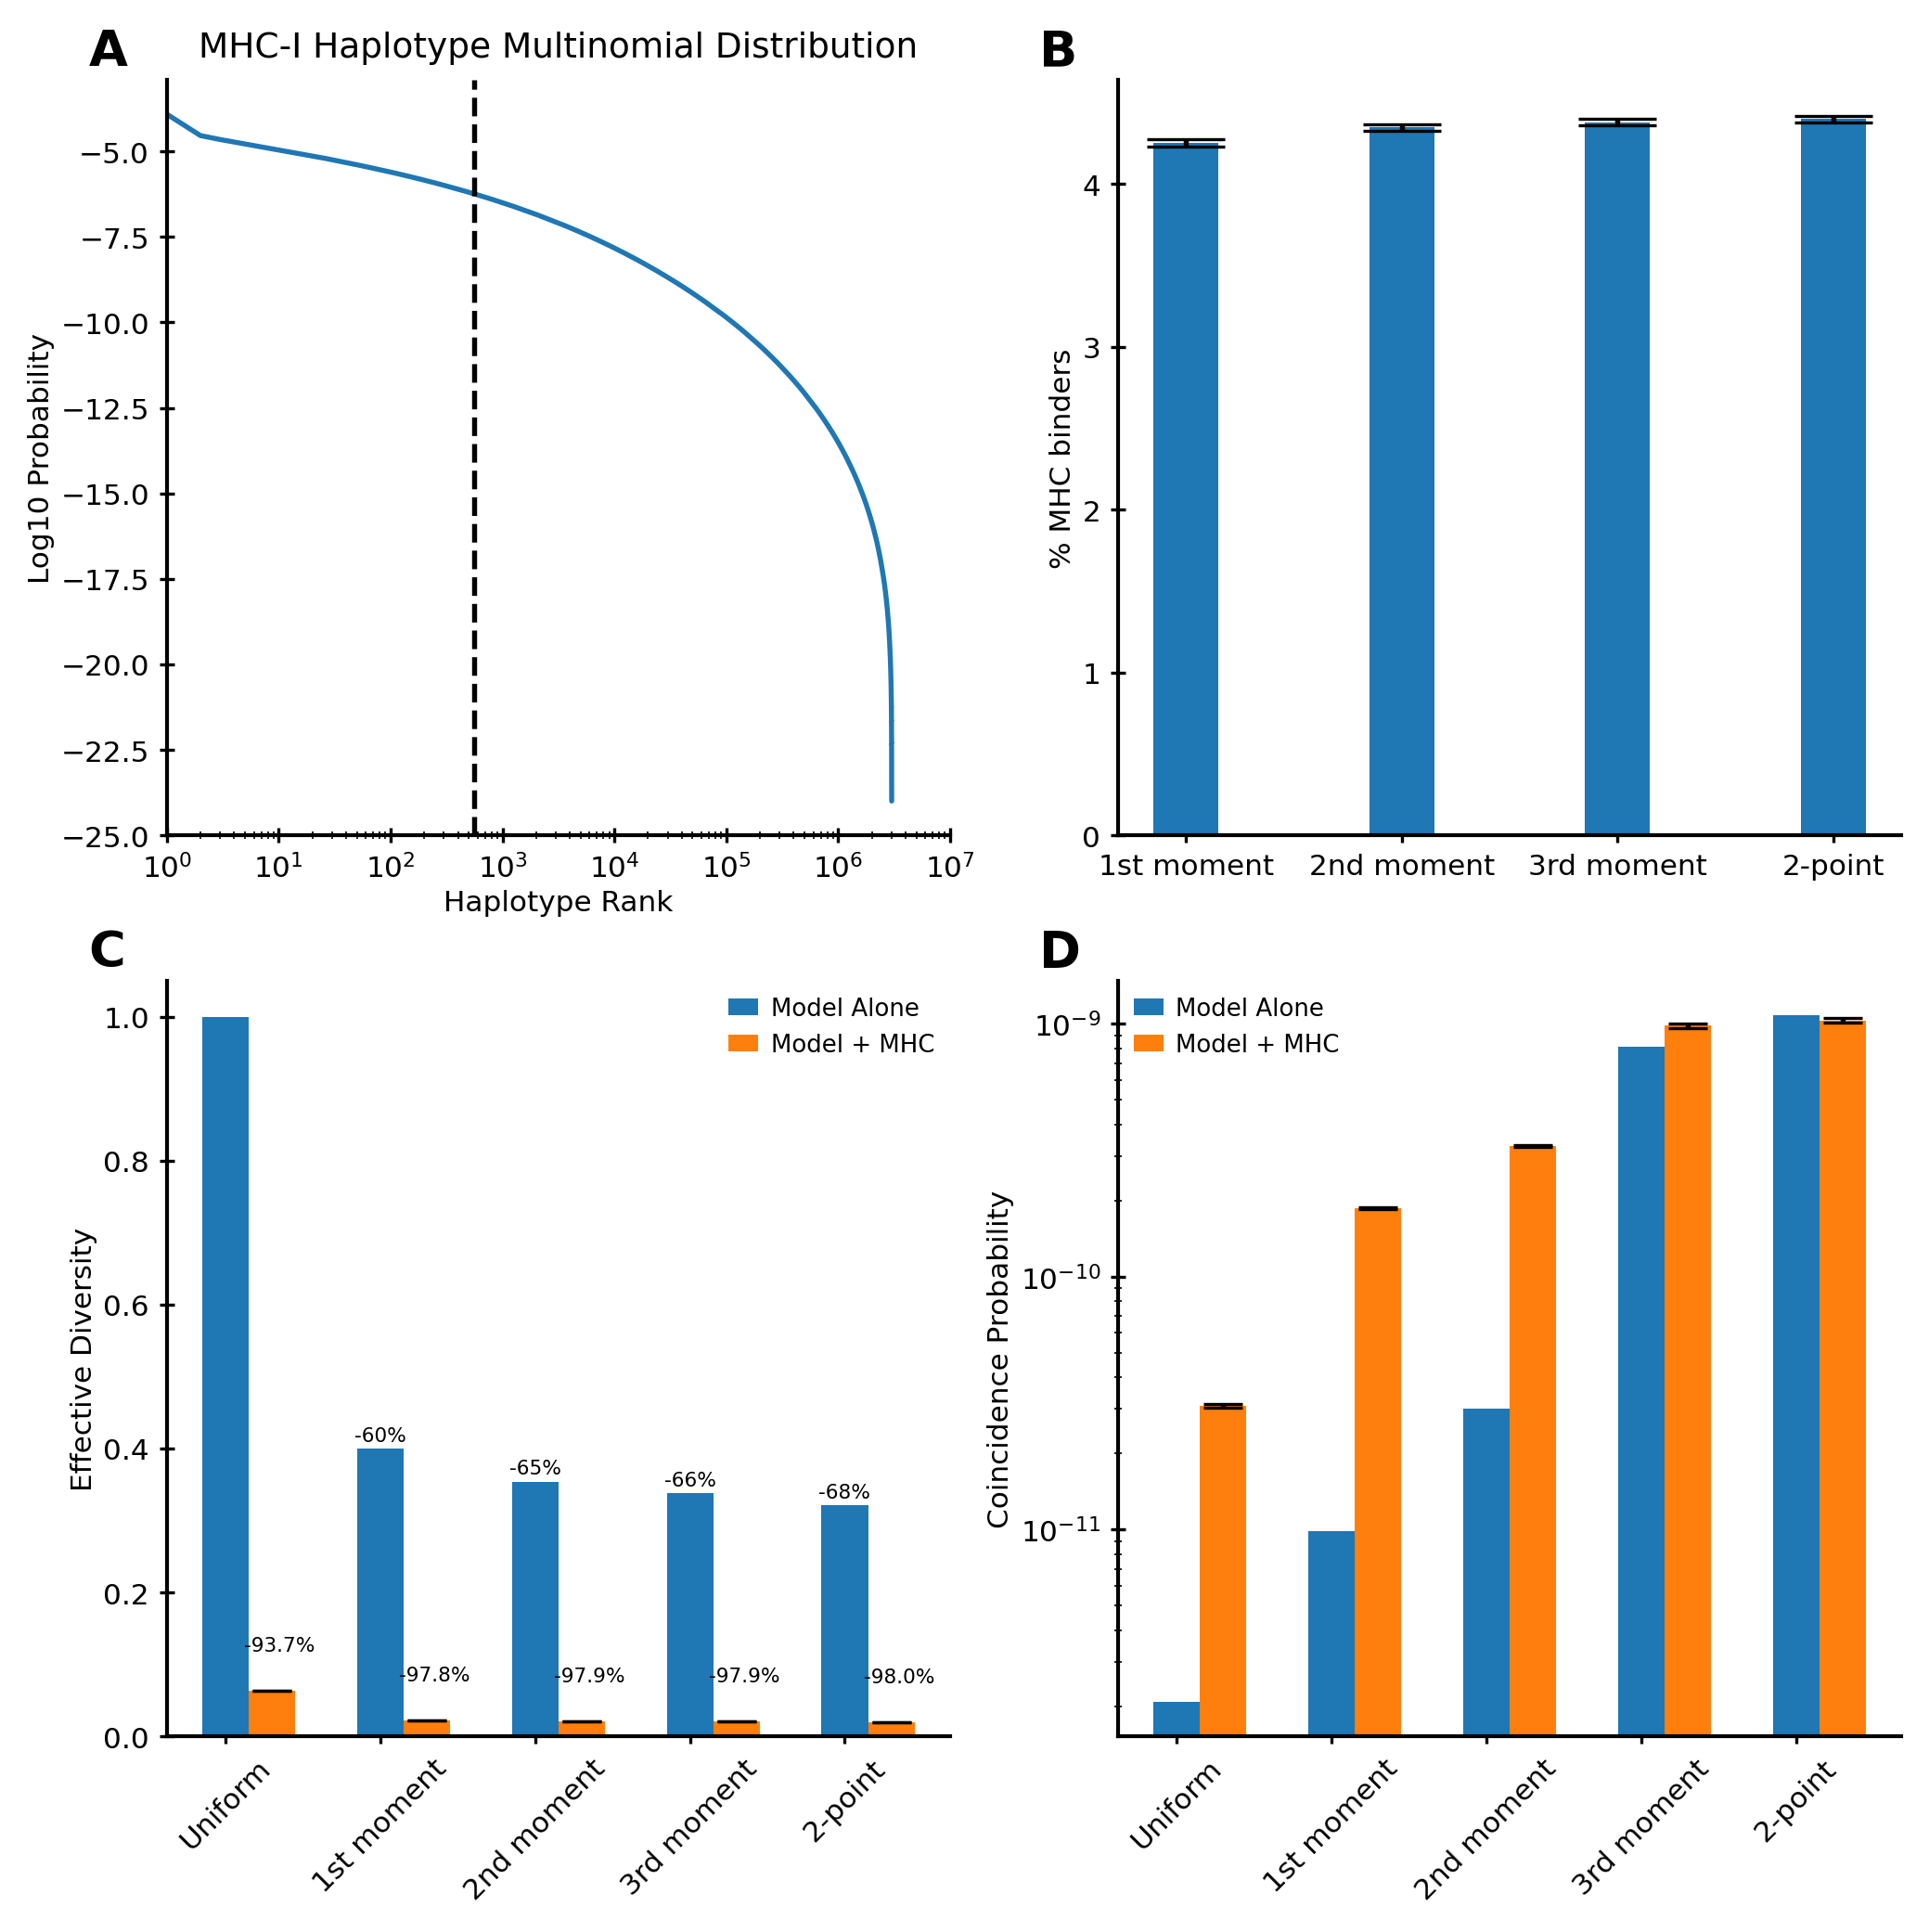

In [5]:
blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
fig, axes = plt.subplots(figsize=(7, 7), ncols=2, nrows=2)

labels_dict = {'uniform' : 'Uniform',
          'independent' : '1st moment',
          'ncov' : '2nd moment',
          'nskew' : '3rd moment',
          'nskewfcov' : '2-point',
          'train' : 'data',
          'test' : 'Test set',
          'uniform HLA': 'uniform HLA'
         }


ax0 = axes[0,0]
ax0.plot(rank, hap_probs)
ax0.axvline(563,color='k',linestyle='--')
ax0.set_xlabel('Haplotype Rank')
ax0.set_ylabel('Log10 Probability')
ax0.set_title('MHC-I Haplotype Multinomial Distribution')
ax0.set_xscale('log')
ax0.set_xlim([1,10**7])


ax1 = axes[0,1]
models = ['independent', 'ncov', 'nskew', 'nskewfcov']
labels = [labels_dict[m] for m in models]
mean_values = [np.mean(np.array(pct_binders[model]['mean'])) for model in models]
ste_values = [np.array(pct_binders[model]['ste']) for model in models]

ind = np.arange(len(models))
width = 0.3       
ax1.bar(ind, mean_values,width,yerr=ste_values,color=blue,capsize=10)
ax1.set_ylabel('% MHC binders')
ax1.set_xticks(ind, labels,rotation=0)

ax2 = axes[1,0]

models = ['uniform', 'independent', 'ncov', 'nskew', 'nskewfcov']
ind = np.arange(len(models))
width = 0.3
labels = [labels_dict[m] for m in models]

mean_values = [np.mean(np.array(diversity[model]['mean'])) for model in models]
reference_value = mean_values[0]
rects = ax2.bar(ind, mean_values,width,color=blue,label='Model Alone')
reduction = np.abs((mean_values[1:]-reference_value)/reference_value)

for rect, toplabel in zip(rects[1:], reduction):
    ax2.annotate('-{0:.0f}%'.format(100*toplabel),
                xy=(rect.get_x()+width/2, rect.get_height()),
                xytext=(0, 1),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize='xx-small')

mean_values = [np.mean(np.array(diversity[model]['mean_mhc'])) for model in models]
ste_values = [np.array(diversity[model]['ste_mhc']) for model in models]
rects = ax2.bar(ind+width, mean_values,width,yerr=ste_values,color=orange,capsize=5,label='Model + MHC')

reduction = np.abs((mean_values-reference_value)/reference_value)
for rect, toplabel in zip(rects, reduction):
    ax2.annotate('-{0:.1f}%'.format(100*toplabel),
                xy=(rect.get_x()+width/2+.05, rect.get_height()+.045),
                xytext=(0, 1),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize='xx-small')


ax2.set_ylabel('Effective Diversity')
ax2.set_xticks(ind, labels,rotation=45)
ax2.legend()

ax3 = axes[1,1]

models = ['uniform', 'independent', 'ncov', 'nskew', 'nskewfcov']
ind = np.arange(len(models))
width = 0.3
labels = [labels_dict[m] for m in models]

mean_values = [np.mean(np.array(coincidence[model]['mean'])) for model in models]
ax3.bar(ind, mean_values,width,color=blue,label='Model Alone')


mean_values = [np.mean(np.array(coincidence[model]['mean_mhc'])) for model in models]
ste_values = [np.array(coincidence[model]['ste_mhc']) for model in models]
ax3.bar(ind+width, mean_values,width,yerr=ste_values,color=orange,capsize=5,label='Model + MHC')

ax3.set_ylabel('Coincidence Probability')
ax3.set_yscale('log')
ax3.set_xticks(ind, labels,rotation=45)
ax3.legend()

label_axes(fig, labelstyle='%s', xy=(-0.1, 1.07),fontsize=13)
fig.tight_layout(h_pad=.5)

# fig.savefig('../figs1.svg')
# fig.savefig('../figs1.png')

In [ ]:
# rescale panel C

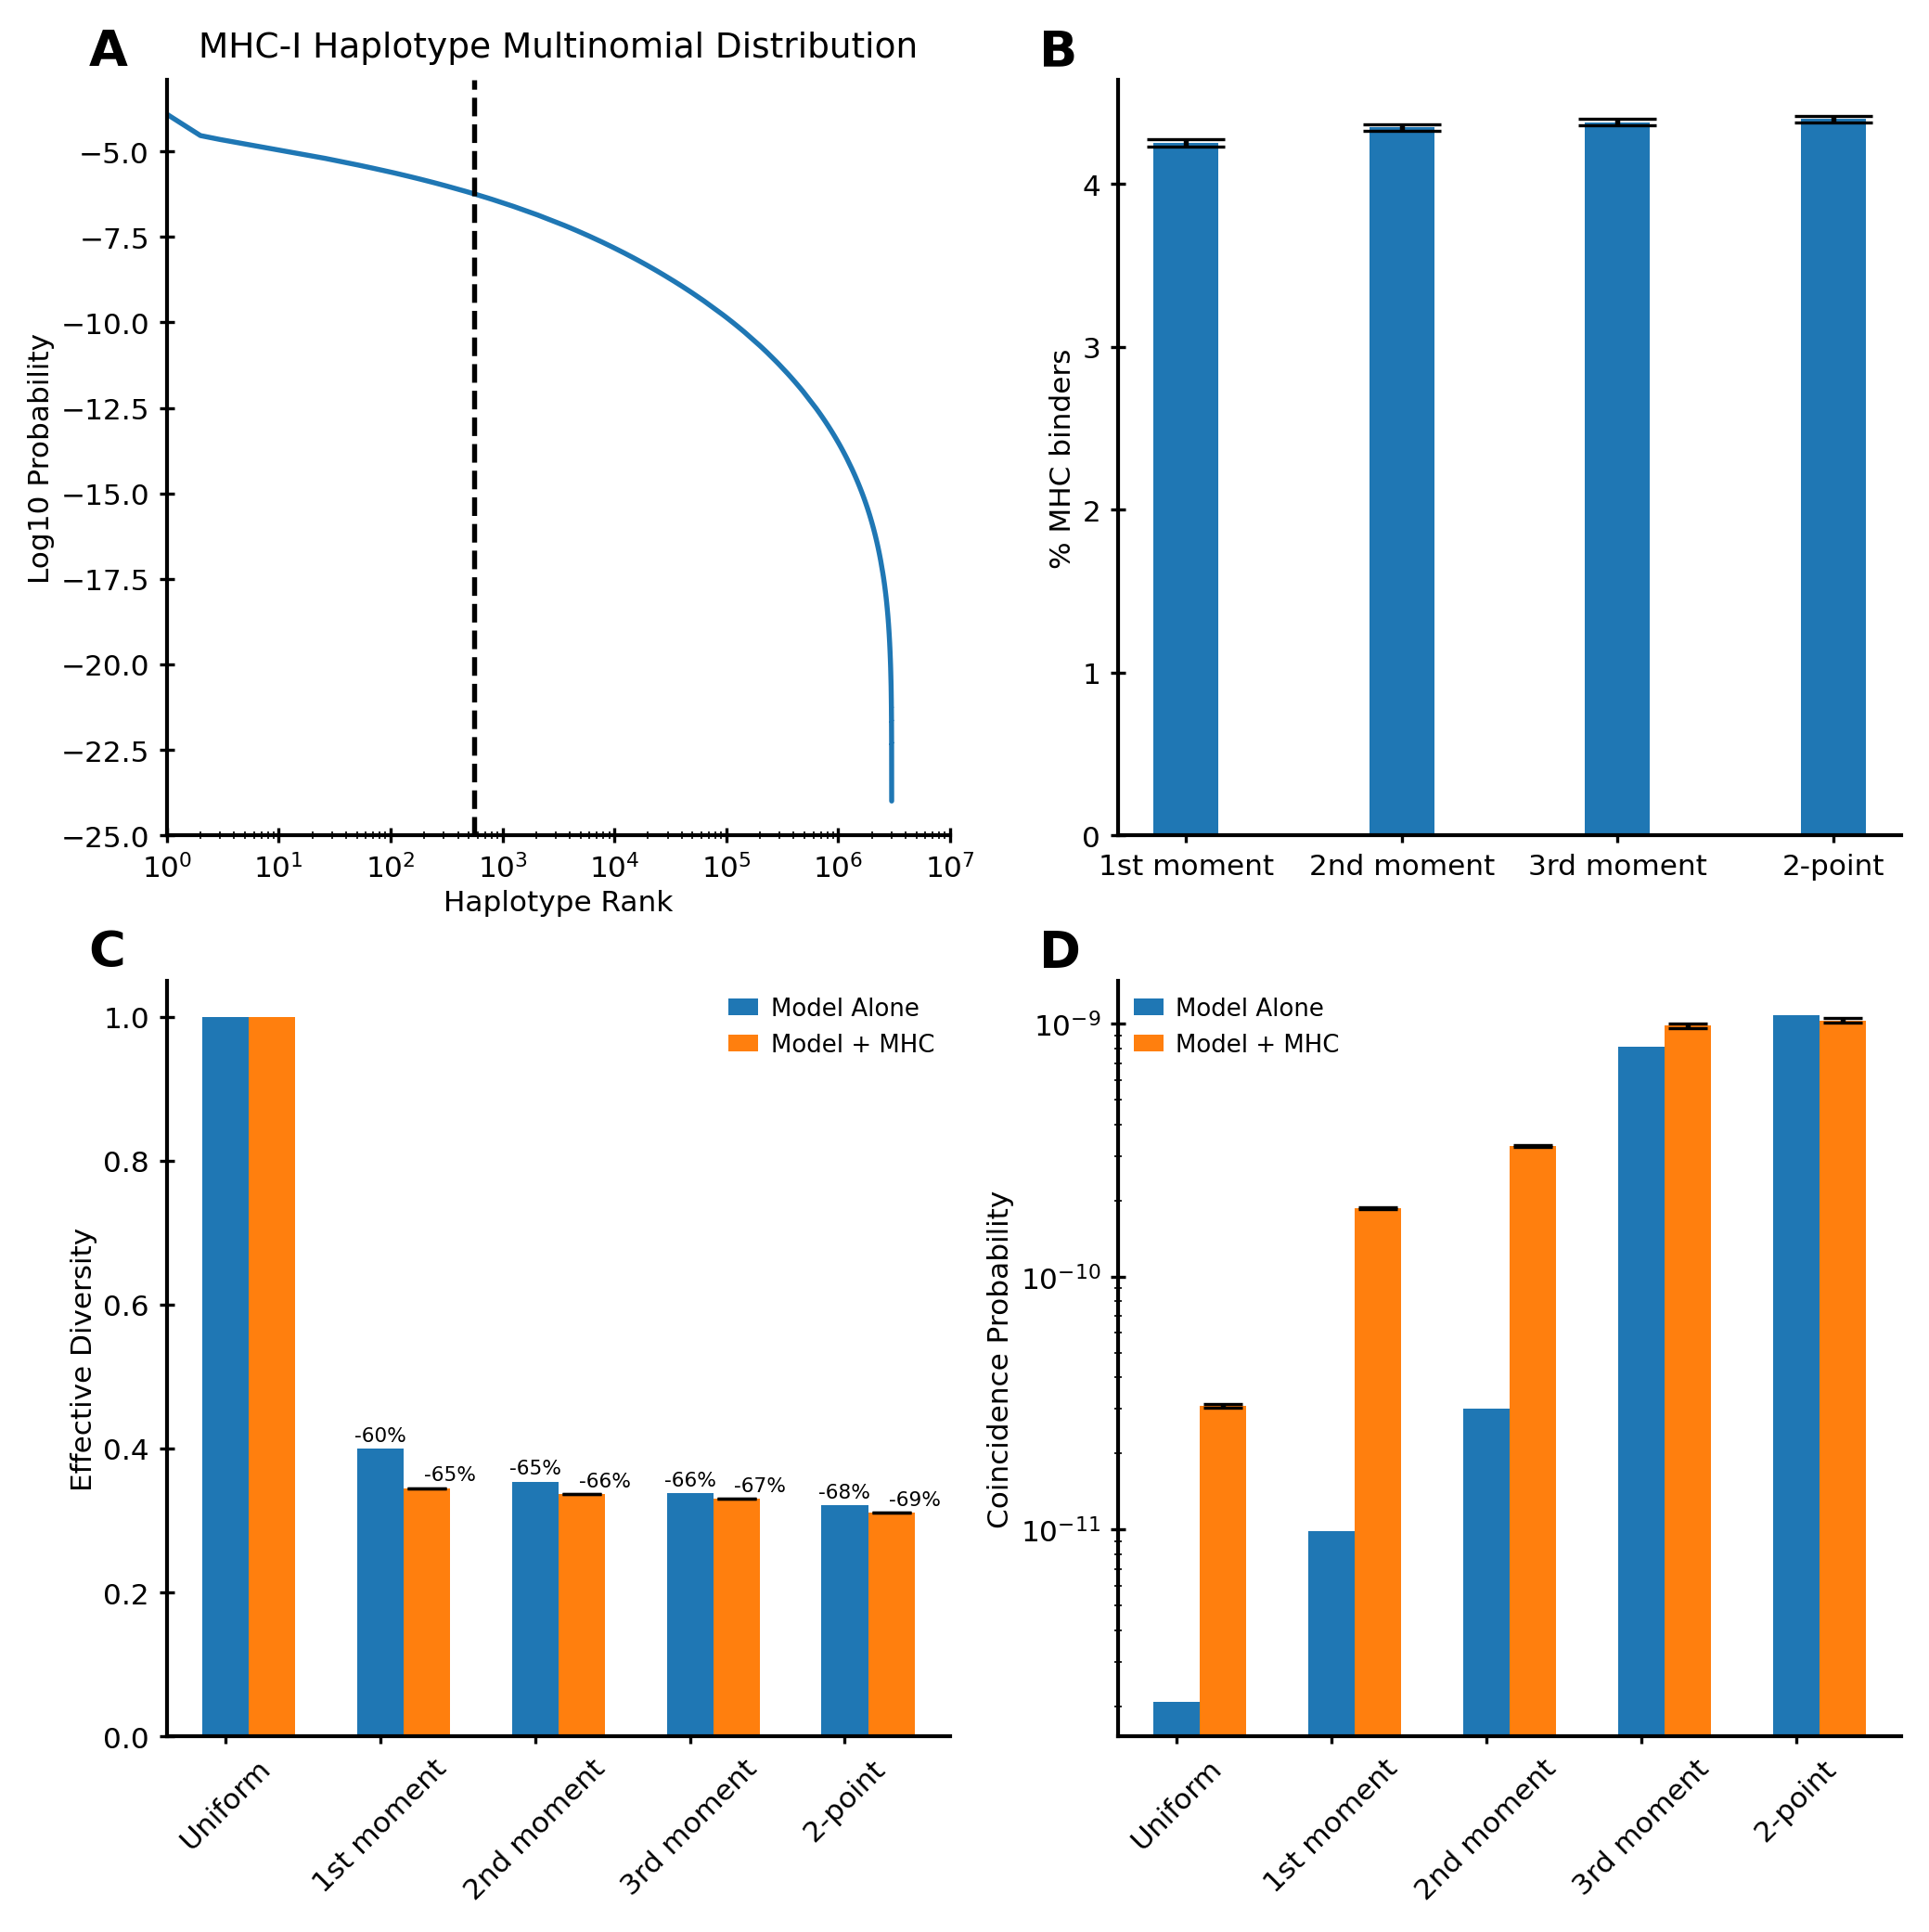

In [19]:
blue = '#1f77b4'
orange = '#ff7f0e'
green = '#2ca02c'
fig, axes = plt.subplots(figsize=(7, 7), ncols=2, nrows=2)

labels_dict = {'uniform' : 'Uniform',
          'independent' : '1st moment',
          'ncov' : '2nd moment',
          'nskew' : '3rd moment',
          'nskewfcov' : '2-point',
          'train' : 'data',
          'test' : 'Test set',
          'uniform HLA': 'uniform HLA'
         }


ax0 = axes[0,0]
ax0.plot(rank, hap_probs)
ax0.axvline(563,color='k',linestyle='--')
ax0.set_xlabel('Haplotype Rank')
ax0.set_ylabel('Log10 Probability')
ax0.set_title('MHC-I Haplotype Multinomial Distribution')
ax0.set_xscale('log')
ax0.set_xlim([1,10**7])


ax1 = axes[0,1]
models = ['independent', 'ncov', 'nskew', 'nskewfcov']
labels = [labels_dict[m] for m in models]
mean_values = [np.mean(np.array(pct_binders[model]['mean'])) for model in models]
ste_values = [np.array(pct_binders[model]['ste']) for model in models]

ind = np.arange(len(models))
width = 0.3       
ax1.bar(ind, mean_values,width,yerr=ste_values,color=blue,capsize=10)
ax1.set_ylabel('% MHC binders')
ax1.set_xticks(ind, labels,rotation=0)

ax2 = axes[1,0]

models = ['uniform', 'independent', 'ncov', 'nskew', 'nskewfcov']
ind = np.arange(len(models))
width = 0.3
labels = [labels_dict[m] for m in models]

mean_values = [np.mean(np.array(diversity[model]['mean'])) for model in models]
reference_value = mean_values[0]
rects = ax2.bar(ind, mean_values,width,color=blue,label='Model Alone')
reduction = np.abs((mean_values[1:]-reference_value)/reference_value)

for rect, toplabel in zip(rects[1:], reduction):
    ax2.annotate('-{0:.0f}%'.format(100*toplabel),
                xy=(rect.get_x()+width/2, rect.get_height()),
                xytext=(0, 1),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize='xx-small')

mean_values = [np.mean(np.array(diversity[model]['mean_mhc'])) for model in models]
reference_value = mean_values[0]
reduction = np.abs((mean_values[1:]-reference_value)/reference_value)

mean_values = np.array(mean_values)/reference_value
ste_values = [np.array(diversity[model]['ste_mhc']) for model in models]
rects = ax2.bar(ind[0]+width, mean_values[0],width,color=orange,capsize=5,label='Model + MHC')
rects = ax2.bar(ind[1:]+width, mean_values[1:],width,yerr=ste_values[1:],color=orange,capsize=5)

# reduction = np.abs((mean_values-reference_value)/reference_value)
for rect, toplabel in zip(rects, reduction):
    ax2.annotate('-{0:.0f}%'.format(100*toplabel),
                xy=(rect.get_x()+width/2+.15, rect.get_height()),
                xytext=(0, 1),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize='xx-small')


ax2.set_ylabel('Effective Diversity')
ax2.set_xticks(ind, labels,rotation=45)
ax2.legend()

ax3 = axes[1,1]

models = ['uniform', 'independent', 'ncov', 'nskew', 'nskewfcov']
ind = np.arange(len(models))
width = 0.3
labels = [labels_dict[m] for m in models]

mean_values = [np.mean(np.array(coincidence[model]['mean'])) for model in models]
ax3.bar(ind, mean_values,width,color=blue,label='Model Alone')


mean_values = [np.mean(np.array(coincidence[model]['mean_mhc'])) for model in models]
ste_values = [np.array(coincidence[model]['ste_mhc']) for model in models]
ax3.bar(ind+width, mean_values,width,yerr=ste_values,color=orange,capsize=5,label='Model + MHC')

ax3.set_ylabel('Coincidence Probability')
ax3.set_yscale('log')
ax3.set_xticks(ind, labels,rotation=45)
ax3.legend()

label_axes(fig, labelstyle='%s', xy=(-0.1, 1.07),fontsize=13)
fig.tight_layout(h_pad=.5)

# fig.savefig('../figs1.svg')
fig.savefig('../figs3.png')

In [9]:
reduction

array([14.82610112,  4.46193079,  4.32098384,  4.2290407 ,  3.91192337])